In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib. pyplot as plt

In [2]:
df = pd.read_csv("Data.csv")

In [3]:
data = df[["If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?","Age","RespondentID"]]

In [4]:
data = data.replace('-',np.NaN)

In [5]:
a = data.groupby(by = ["Age","If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?"]).count().unstack()
a

RespondentID  \
If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device? Somewhat likely   
Age                                                                                                                                                            
18 - 29                                                                                                                                                   61   
30 - 44                                                                                                                                                   68   
45 - 59                                                                                                                                                   73   
60+                                                                                                                                                       71   

                                                                                                                                                                \
If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device? Somewhat unlikely   
Age                                                                                                                                                              
18 - 29                                                                                                                                                     11   
30 - 44                                                                                                                                                     14   
45 - 59                                                                                                                                                     20   
60+                                                                                                                                                         28   

                                                                                                                                                          \
If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device? Very likely   
Age                                                                                                                                                        
18 - 29                                                                                                                                               68   
30 - 44                                                                                                                                               71   
45 - 59                                                                                                                                              128   
60+                                                                                                                                                   95   

                                                                                                                                                            
If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device? Very unlikely  
Age                                                                                                                                                         
18 - 29                                                                                                                                                 36  
30 - 44                                                                                                                                                 51  
45 - 59   

In [6]:
raw_data = {"Age": ["18 - 29", "30 - 44", "45 - 59", "60+"],
                "Somewhat likely": [61,68,73,71],
                "Somewhat unlikely": [11,14,20,28],
                "Very likely": [68,71,128,95],
           "Very unlikely": [36,51,57,64]}
df = pd.DataFrame(raw_data, columns = ["Age", "Somewhat likely", "Somewhat unlikely", "Very likely","Very unlikely"])
print(df)

       Age  Somewhat likely  Somewhat unlikely  Very likely  Very unlikely
0  18 - 29               61                 11           68             36
1  30 - 44               68                 14           71             51
2  45 - 59               73                 20          128             57
3      60+               71                 28           95             64


In [7]:
fields = ['Somewhat likely', 'Somewhat unlikely','Very likely','Very unlikely']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']
labels = ['Somewhat likely', 'Somewhat unlikely','Very likely','Very unlikely']

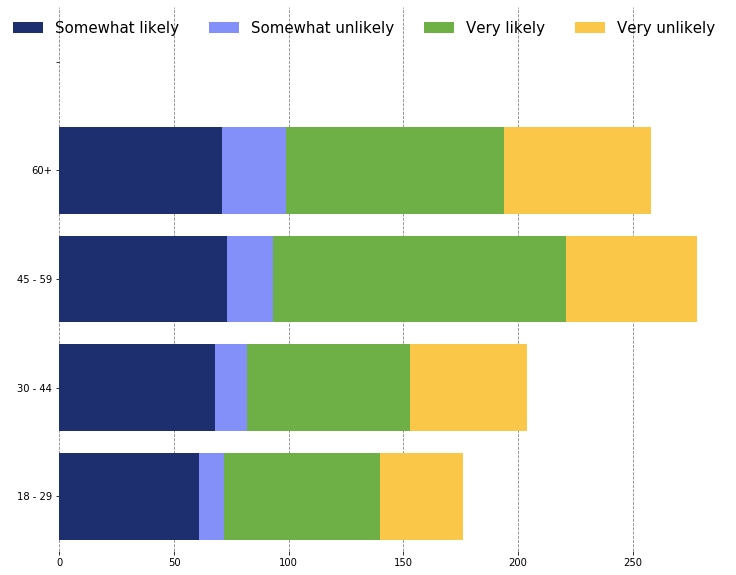

In [8]:
# figure and axis
fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
left = len(df) * [0]
for idx, name in enumerate(fields):
    plt.barh(df.index, df[name], left = left, color=colors[idx])
    left = left + df[name]
# title, legend, labels
plt.title('', loc='left')
plt.legend(labels, ncol=4, frameon=False,fontsize=15)
plt.xlabel('')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
ax.set_yticklabels(("","18 - 29","30 - 44","45 - 59","60+"))
plt.show()

In [9]:
df2 = df.iloc[:,1:].sum(axis = 1)
df2 = df2.values.reshape(4,1)

In [10]:
df3 = pd.DataFrame(df.iloc[:,1:].values/df2,columns = df.columns[1:])
df3['Age'] = df["Age"]
df3 = df3[["Age","Somewhat likely","Somewhat unlikely","Very likely","Very unlikely"]]
df3

,Age,Somewhat likely,Somewhat unlikely,Very likely,Very unlikely
0,18 - 29,0.346591,0.062500,0.386364,0.204545
1,30 - 44,0.333333,0.068627,0.348039,0.250000
2,45 - 59,0.262590,0.071942,0.460432,0.205036
3,60+,0.275194,0.108527,0.368217,0.248062


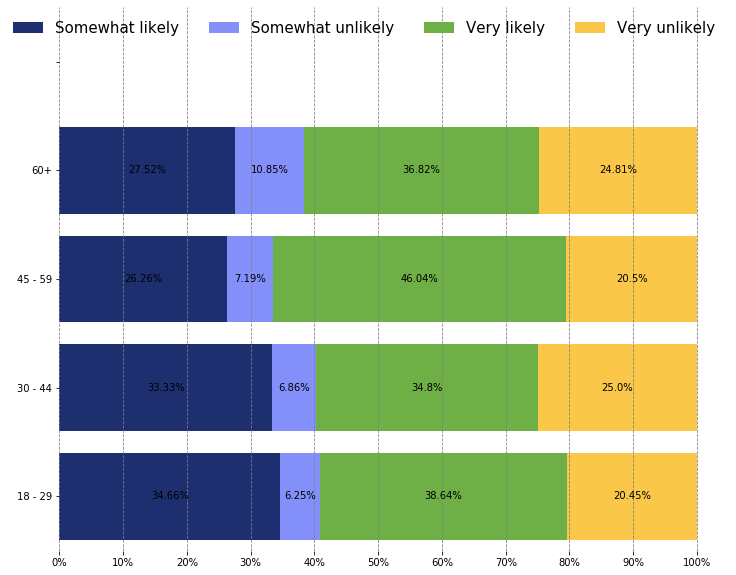

In [11]:
def plot_stackedbar_p(df, labels, colors, title, subtitle):
    fields = ['Somewhat likely', 'Somewhat unlikely','Very likely','Very unlikely']
    
    # figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
    left = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df.index, df[name], left = left, color=colors[idx])
        left = left + df[name]
# title and subtitle
    plt.title(title, loc='left')
    plt.text(0, ax.get_yticks()[-1] + 0.75, subtitle)
# legend
    plt.legend(labels, ncol=4, frameon=False,fontsize=15)
# remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
# format x ticks
    xticks = np.arange(0,1.1,0.1)
    xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
    plt.xticks(xticks, xlabels)
# adjust limits and draw grid lines
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.xaxis.grid(color='gray', linestyle='dashed')
    ax.set_yticklabels(("","18 - 29","30 - 44","45 - 59","60+"))
    for n in df.iloc[:,1:]: 
        for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], df.iloc[:, 1:][n], df.iloc[:, 1:][n])): 
            plt.text(cs - ab / 2, i, str(np.round(pc*100, 2)) + '%',  
                 va = 'center', ha = 'center')
plt.show()
        
plot_stackedbar_p(df3, labels, colors, "", "")

In [12]:
import matplotlib.gridspec as gridspec

## sub 1

In [13]:
def plot_stackedbar_p(df, labels, colors, title, subtitle,ax):
    fields = ['Somewhat likely', 'Somewhat unlikely','Very likely','Very unlikely']
    
    # figure and axis
    #fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
    left = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df.index, df[name], left = left, color=colors[idx])
        left = left + df[name]
# title and subtitle
    plt.title(title, loc='left')
    plt.text(0, ax.get_yticks()[-1] + 0.75, subtitle)
# legend
    plt.legend(labels, ncol=4, frameon=False,fontsize=15)
# remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
# format x ticks
    xticks = np.arange(0,1.1,0.1)
    xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
    plt.xticks(xticks, xlabels)
# adjust limits and draw grid lines
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.xaxis.grid(color='gray', linestyle='dashed')
    ax.set_yticklabels(("","18 - 29","30 - 44","45 - 59","60+"))
    for n in df.iloc[:,1:]: 
        for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], df.iloc[:, 1:][n], df.iloc[:, 1:][n])): 
            plt.text(cs - ab / 2, i, str(np.round(pc*100, 2)) + '%',  
                 va = 'center', ha = 'center')
    return ax
        
#plot_stackedbar_p(df3, labels, colors, "", "")

## sub2

In [14]:
def plot_stackedbar_sub(df, labels, colors, title, subtitle,ax):
    # figure and axis
    #fig, ax = plt.subplots(1, figsize=(12, 10))
    # plot bars
    left = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df.index, df[name], left = left, color=colors[idx])
        left = left + df[name]
    # title, legend, labels
    plt.title('', loc='left')
    plt.legend(labels, ncol=4, frameon=False,fontsize=15)
    plt.xlabel('')
    # remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # adjust limits and draw grid lines
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.set_axisbelow(True)
    ax.xaxis.grid(color='gray', linestyle='dashed')
    ax.set_yticklabels(("","18 - 29","30 - 44","45 - 59","60+"))
    return ax

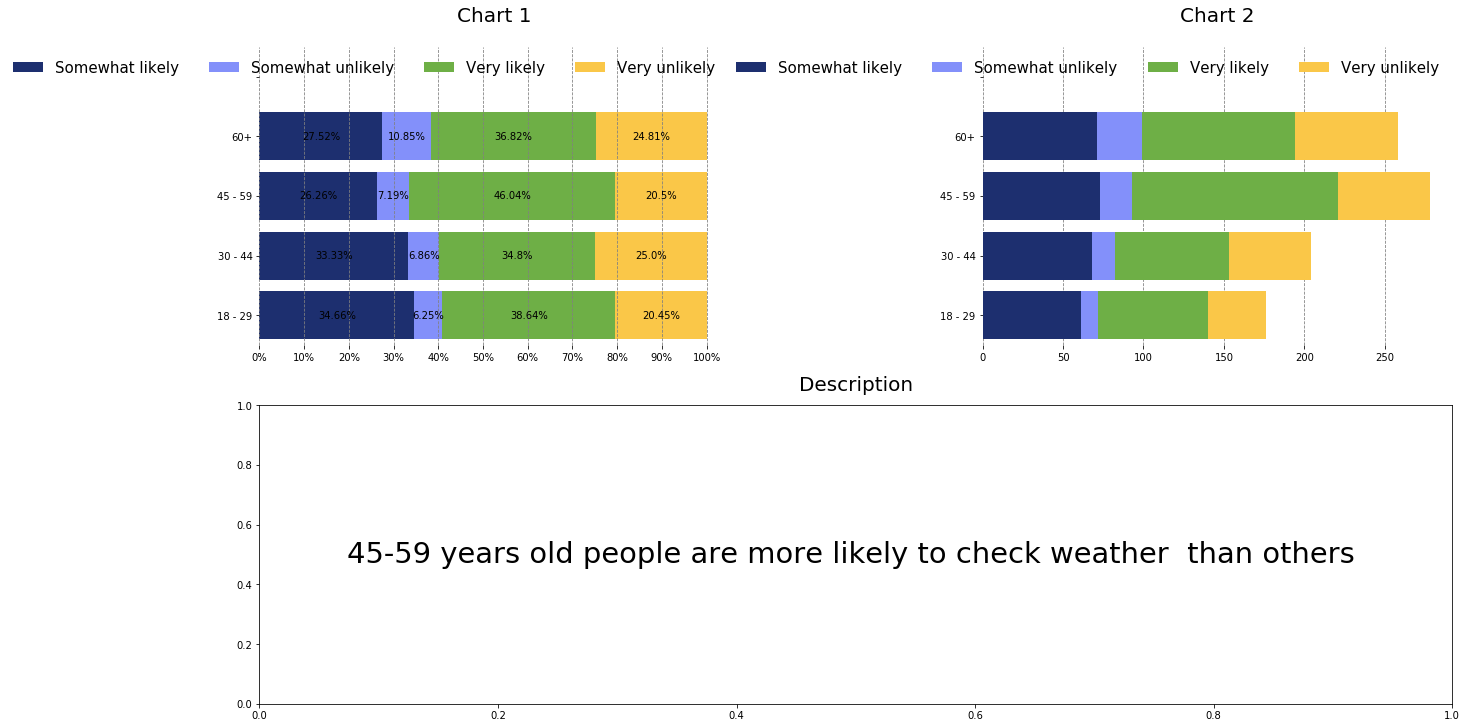

In [17]:
fig = plt.figure(constrained_layout=True,figsize=(20,10))
gs = fig.add_gridspec(2, 2)
fg_ax1 = fig.add_subplot(gs[0, 0])
plot_stackedbar_p(df3, labels, colors, "", "",fg_ax1)
#fg_ax1.plot(x,y)
fg_ax1.set_title('Chart 1',size=20,pad=25)

fg_ax2 = fig.add_subplot(gs[0, 1])
plot_stackedbar_sub(df, labels, colors, "", "",fg_ax2)
fg_ax2.set_title('Chart 2',size=20,pad=25)

fg_ax3 = fig.add_subplot(gs[1, :])
anno_opts = dict(xy=(0.5, 0.5), xycoords='axes fraction',
                 va='center', ha='center',size=29)
fg_ax3.annotate('45-59 years old people are more likely to check weather  than others ', **anno_opts)
fg_ax3.set_title('Description',size=20,pad=15)
plt.show()